In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Deerwalk class/dataset/daraz final dataset.csv')
data.head(5)

C:\Users\aakas\AppData\Local\Temp\ipykernel_17720\122539872.py:1: DtypeWarning: Columns (19,32,43,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Deerwalk class/dataset/daraz final dataset.csv')


,Unnamed: 0,Seller Name,Order Item Id,Daraz Id,Seller SKU,Daraz SKU,Created at,Updated at,Order Number,Order Source,Order Currency,Customer Name,National Registration Number,Shipping Name,Shipping Address,Shipping Address2,Shipping Address3,Shipping Address4,Shipping Address5,Shipping Phone Number,Shipping Phone Number2,Shipping City,Shipping Postcode,Shipping Country,Shipping Region,Billing Name,Billing Address,Billing Address2,Billing Address3,Billing Address4,Billing Address5,Billing Phone Number,Billing Phone Number2,Billing City,Billing Postcode,Billing Country,Payment Method,Paid Price,Unit Price,Shipping Fee,Wallet Credits,Item Name,Variation,CD Shipping Provider,Shipping Provider,Shipment Type Name,Shipping Provider Type,CD Tracking Code,Tracking Code,Tracking URL,Promised shipping time,Premium,Status,Reason
0,0,Nepbuy Store,127840,164325,3 in 1 sunglasses,OT776FA06FVZSNAFAMZ-131232,2018-03-31 23:36:06,2018-04-04 16:20:52,300633752,NaN,NaN,Sijan Khadka,NaN,Sijan Khadka,Budhanilkantha metropolitan,Khadka bhadrakali ward no 6,NaN,NaN,NaN,9803190884,NaN,Kathmandu Outside Ring Road,NaN,Nepal,Bagmati,Sijan Khadka,Budhanilkantha metropolitan,Khadka bhadrakali ward no 6,NaN,NaN,NaN,9.803191e+09,NaN,Kathmandu Outside Ring Road,NaN,Nepal,CashOnDelivery,999.0,999.0,80.0,0,5 In 1 Multi Use Polarized Magnetic Sunglass,One size,NaN,NP-Rapid-Fleet,Dropshipping,NaN,NaN,RP003143,NaN,NaN,No,delivered,NaN
1,1,Converse&VansNepal,127839,164318,7135_DELETED_2018-05-14_08-53-03,VA039FA0D3X74NAFAMZ-116466,2018-03-31 23:20:06,2018-04-04 14:11:19,300313752,NaN,NaN,poshan shakya,NaN,poshan shakya,"hitti pokhari, Durgar Marg",near Royal Palace Museum,NaN,NaN,NaN,9841333227,NaN,Kathmandu Inside Ring Road,NaN,Nepal,Bagmati,poshan shakya,"hitti pokhari, Durgar Marg",near Royal Palace Museum,NaN,NaN,NaN,9.841333e+09,NaN,Kathmandu Inside Ring Road,NaN,Nepal,CashOnDelivery,4005.0,4005.0,50.0,0,VN0A38FSMVH Era 59 Lace Up Shoes For Men 7135 ...,7UK,NaN,NP-Rapid-Fleet,Dropshipping,NaN,NaN,RP003639,NaN,NaN,No,delivered,NaN
2,2,Ramesh impex,127838,164315,WZHNP1606RX07165216-45560-23-01,OT776FA1JY4HKNAFAMZ-21803,2018-03-31 23:08:05,2018-04-05 12:18:23,300713752,NaN,NaN,kheym shrestha,NaN,kheym shrestha,dharan,NaN,NaN,NaN,NaN,9807077875,NaN,Dharan,NaN,Nepal,Koshi,kheym shrestha,dharan,NaN,NaN,NaN,NaN,9.807078e+09,NaN,Dharan,NaN,Nepal,CashOnDelivery,675.0,675.0,120.0,0,Pack of 3 100% Cotton Printed Boxer For Men,M,NaN,NP-Rapid-Fleet,Dropshipping,NaN,NaN,AR02226,NaN,NaN,No,delivered,NaN
3,3,Aafno Pasal,127837,164314,Aafno Pasal (Wireless Router 300),OT776EL01WFQGNAFAMZ-55600,2018-03-31 23:04:05,2018-04-03 10:21:50,300813752,NaN,NaN,Arun Karki,NaN,Arun Karki,#####,#####,#####,#####,#####,9855076567,NaN,#####,#####,#####,#####,Arun Karki,#####,#####,#####,#####,#####,9.855077e+09,NaN,#####,#####,#####,CashOnDelivery,2899.0,2899.0,50.0,0,"N300 Wireless-N Wi-Fi Range Extender, Wi-Fi Re...",...,NaN,NaN,Dropshipping,NaN,NaN,NaN,NaN,NaN,No,canceled,High Value Item-Buyer Cancellation
4,4,Swift,127836,164311,Black Front Surplice Midi Dress,OT776FA1CQDEONAFAMZ-30479,2018-03-31 22:56:11,2018-04-10 16:45:54,300213752,NaN,NaN,Shahdat Ali,NaN,Shahdat Ali,"Pokhara12,gandaki hospital chowk",Gandaki hospital,NaN,NaN,NaN,9816683300,NaN,Pokhara,NaN,Nepal,Gandaki,Shahdat Ali,"Pokhara12,gandaki hospital chowk",Gandaki hospital,NaN,NaN,NaN,9.816683e+09,NaN,Pokhara,NaN,Nepal,CashOnDelivery,1500.0,1500.0,120.0,0,Black Front Surplice Midi Dress,Free size,NaN,NP-Rapid-Fleet,Dropshipping,NaN,NaN,AR02241,NaN,NaN,No,returned,NaN


In [3]:
data.shape

(151554, 54)

In [4]:
dataset_details = {'unique':data.nunique(),
              'dtype':data.dtypes,
             'null':data.isna().sum(),
             'null %':data.isna().sum()/len(data)
             }
dataset_details = pd.DataFrame(dataset_details)
# dataset_details

# Dropping unnecessary columns

In [5]:
cols_to_drop = dataset_details[dataset_details['null %'] > 0.5].index
cols_to_drop

Index(['Order Source', 'Order Currency', 'National Registration Number',
       'Shipping Address2', 'Shipping Address3', 'Shipping Address4',
       'Shipping Address5', 'Shipping Phone Number2', 'Shipping Postcode',
       'Billing Address2', 'Billing Address3', 'Billing Address4',
       'Billing Address5', 'Billing Phone Number2', 'Billing Postcode',
       'CD Shipping Provider', 'Shipping Provider Type', 'CD Tracking Code',
       'Tracking URL', 'Promised shipping time', 'Reason'],
      dtype='object')

In [6]:
''' 
Dropping all the columns that has null values more than 50 %
'''
data.drop(cols_to_drop[0: len(cols_to_drop)-1] , axis = 1 , inplace = True)

In [7]:
data.columns

Index(['Unnamed: 0', 'Seller Name', 'Order Item Id', 'Daraz Id', 'Seller SKU',
       'Daraz SKU', 'Created at', 'Updated at', 'Order Number',
       'Customer Name', 'Shipping Name', 'Shipping Address',
       'Shipping Phone Number', 'Shipping City', 'Shipping Country',
       'Shipping Region', 'Billing Name', 'Billing Address',
       'Billing Phone Number', 'Billing City', 'Billing Country',
       'Payment Method', 'Paid Price', 'Unit Price', 'Shipping Fee',
       'Wallet Credits', 'Item Name', 'Variation', 'Shipping Provider',
       'Shipment Type Name', 'Tracking Code', 'Premium', 'Status', 'Reason'],
      dtype='object')

In [8]:
'''
Dropping unnecessary columns which has no impact on any results
'''

to_drop = ['Unnamed: 0','Order Item Id', 'Daraz Id','Daraz SKU','Customer Name', 
           'Shipping Name','Shipping Phone Number',
           'Billing Name', 'Billing Address',
           'Billing Phone Number', 'Billing City', 'Billing Country',
           'Wallet Credits','Premium']

data.drop(to_drop, axis = 1, inplace= True)

In [9]:
data.shape

(151554, 20)

# Converting object format to date

In [10]:
'''
converting object format to date
'''
data['Created at'] = pd.to_datetime(data['Created at'], format='%Y-%m-%d')
data['Updated at'] = pd.to_datetime(data['Updated at'], format='%Y-%m-%d')

'''
converting int format to object
'''
data['Order Number'] = data['Order Number'].astype(str)

In [11]:
data_details = {'unique':data.nunique(),
              'dtype':data.dtypes,
             'null':data.isna().sum(),
             'null %':data.isna().sum()/len(data)
             }
data_details = pd.DataFrame(data_details)
data_details

,unique,dtype,null,null %
Seller Name,554,object,0,0.000000
Seller SKU,29947,object,0,0.000000
Created at,45533,datetime64[ns],0,0.000000
Updated at,60166,datetime64[ns],0,0.000000
Order Number,96277,object,0,0.000000
Shipping Address,38583,object,0,0.000000
Shipping City,51,object,0,0.000000
Shipping Country,2,object,0,0.000000
Shipping Region,10,object,30,0.000198
Payment Method,2,object,0,0.000000


In [12]:
'''
Dropping all duplicates rows in the data frame
'''
data.drop_duplicates(inplace=True)


In [13]:
data.shape

(143024, 20)

In [14]:
cat_col = data.select_dtypes(include= 'object')
cat_col.columns

Index(['Seller Name', 'Seller SKU', 'Order Number', 'Shipping Address',
       'Shipping City', 'Shipping Country', 'Shipping Region',
       'Payment Method', 'Item Name', 'Variation', 'Shipping Provider',
       'Shipment Type Name', 'Tracking Code', 'Status', 'Reason'],
      dtype='object')

In [15]:
num_col = data.select_dtypes(include= 'float64')
num_col.columns

Index(['Paid Price', 'Unit Price', 'Shipping Fee'], dtype='object')

# Value Count of Categorical Columns

In [16]:
val_cat_col = ['Seller Name',
           'Shipping City', 'Shipping Country', 'Shipping Region',
           'Payment Method', 'Item Name', 'Shipping Provider',
           'Shipment Type Name', 'Status', 'Reason']

for col in val_cat_col:
    print(f'value count of {col} ')
    value = {'value' : data[col].value_counts().head(30),
             'percentage':(data[col].value_counts().head(30) * 100 ) /len(data[col]) }
    value = pd.DataFrame(value)
    print(value)
    print('------------------------------------- ')

value count of Seller Name 
                         value  percentage
NewLifeStyle              7024    4.911064
Aafno Pasal               6461    4.517424
Onlineshopgroup           5645    3.946890
AB Tech                   5496    3.842712
KpItSolution              5405    3.779086
Ramesh impex              5024    3.512697
Alina Traders             3820    2.670880
waiwaiparts               3682    2.574393
Best Choice               3493    2.442247
Swift                     2840    1.985681
NayaaNaulo                2626    1.836055
Sherpa Ventures           2421    1.692723
shristy fashion           2347    1.640983
bestdeals                 2331    1.629796
GuitarShop                2277    1.592040
softvisionmultisolution   1939    1.355717
sastotrade                1896    1.325652
abfancystore              1745    1.220075
Laughing Buddha           1734    1.212384
Gadget Guru               1599    1.117994
Goldstar                  1561    1.091425
aarush31                  

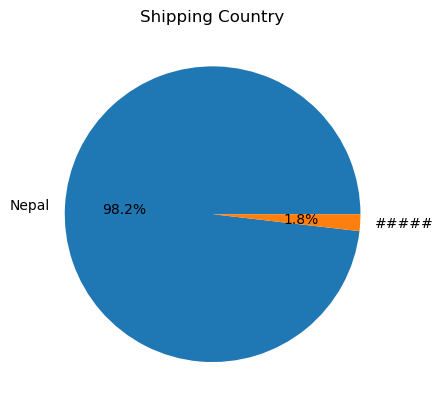

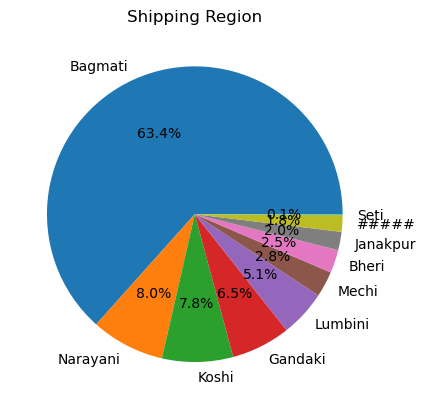

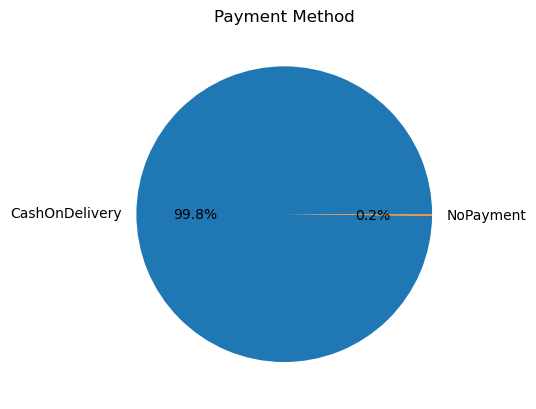

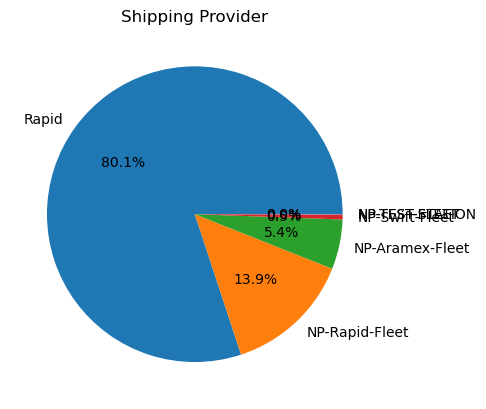

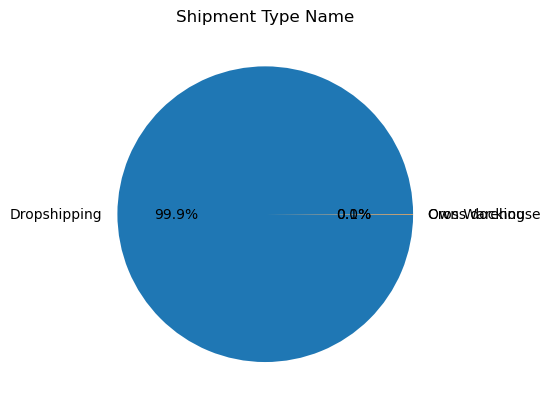

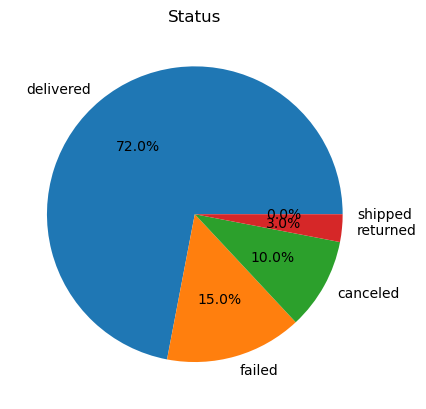

In [59]:
val_cat_col = [ 'Shipping Country', 'Shipping Region',
           'Payment Method', 'Shipping Provider',
           'Shipment Type Name', 'Status']

for col in val_cat_col:
    # get the value counts for the column
    col_count = data[col].value_counts()

    # create a pie chart
    fig, ax = plt.subplots()
    ax.pie(col_count.values, labels=col_count.index, autopct='%1.1f%%')
    ax.set_title(col)

    # display the plot
    plt.show()

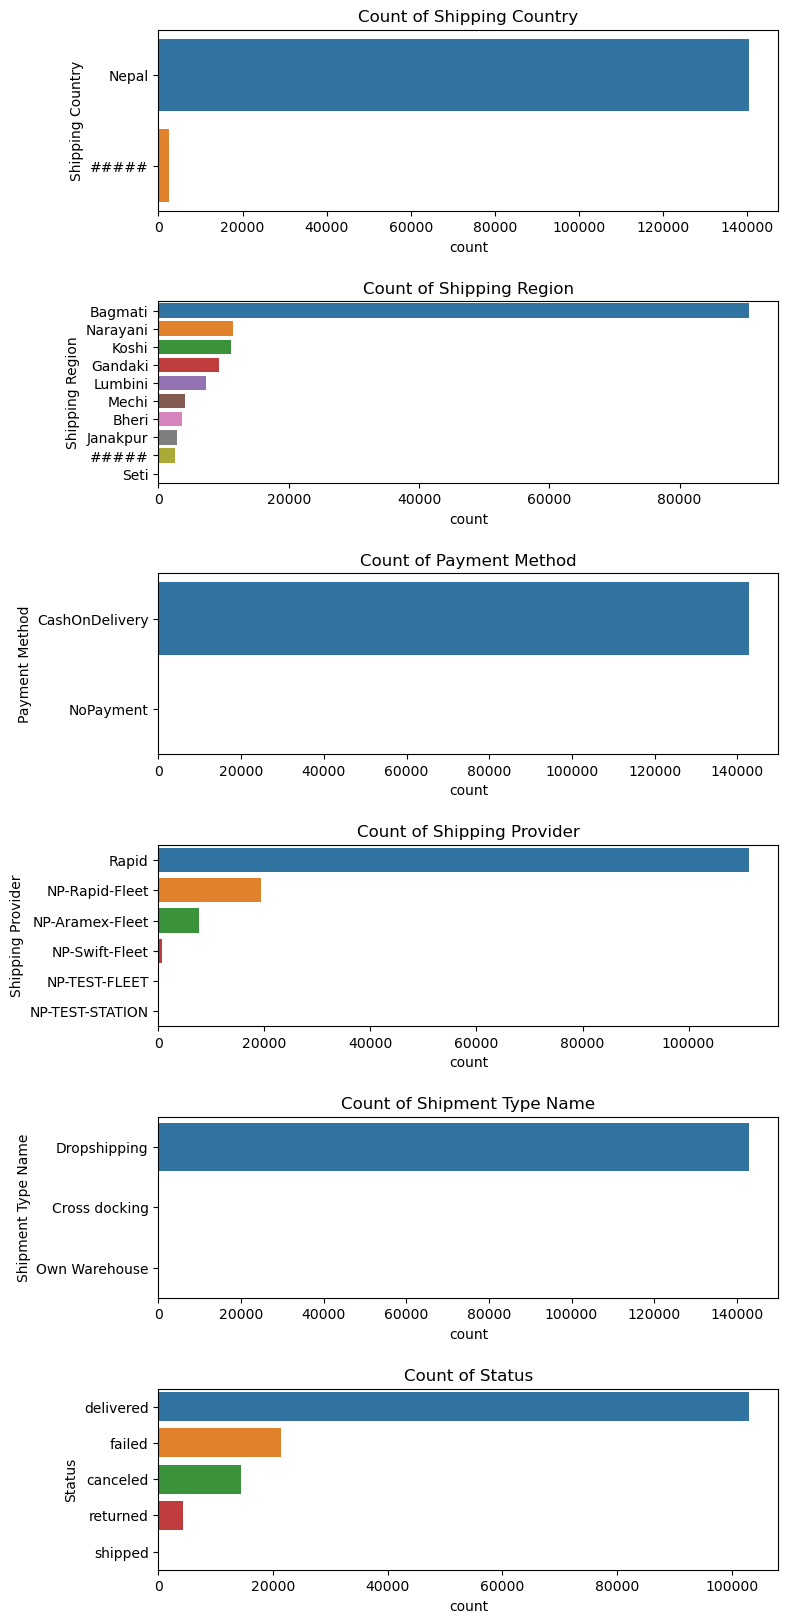

In [48]:


# create subplots for each column in val_cat_col
fig, axes = plt.subplots(len(val_cat_col), 1, figsize=(8, 20))

for i, col in enumerate(val_cat_col):
    # get the top 15 value counts for the column
    col_count = data[col].value_counts().head(15)
    
    # create a countplot for the column
    sns.countplot(y=col  ,data=data, order=col_count.index, ax=axes[i])
    
    # set the title and axis labels
    axes[i].set_title(f'Count of {col}')
    # axes[i].set_xlabel(col)
    # axes[i].set_ylabel('Count')
    
    # set the rotation of the x-axis labels
    # axes[i].tick_params(axis='x', labelrotation=70)
   
# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# display the plot
plt.show()
    

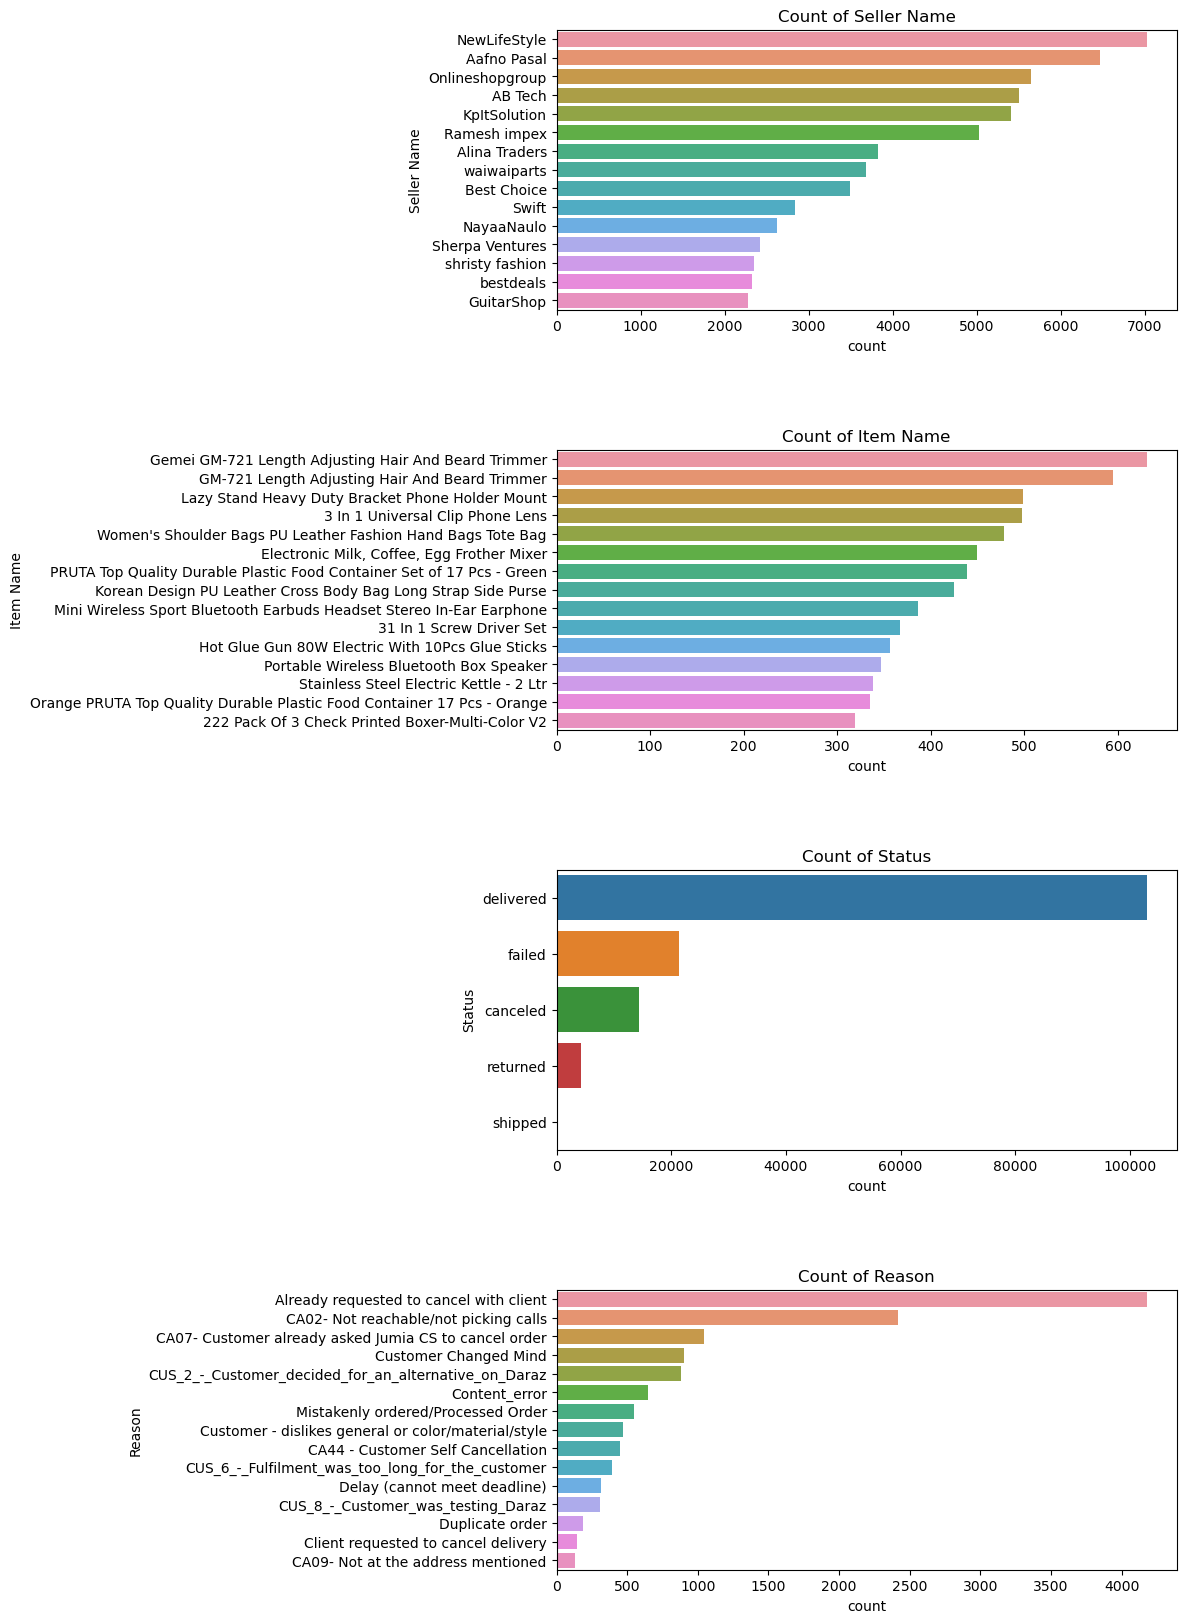

In [49]:
val_cat_col = [ 'Seller Name','Item Name','Status', 'Reason']

# create subplots for each column in val_cat_col
fig, axes = plt.subplots(len(val_cat_col), 1, figsize=(8, 20))

for i, col in enumerate(val_cat_col):
    # get the top 15 value counts for the column
    col_count = data[col].value_counts().head(15)
    
    # create a countplot for the column
    sns.countplot(y=col  ,data=data, order=col_count.index, ax=axes[i])
    
    # set the title and axis labels
    axes[i].set_title(f'Count of {col}')
    # axes[i].set_xlabel(col)
    # axes[i].set_ylabel('Count')
    
    # set the rotation of the x-axis labels
    # axes[i].tick_params(axis='x', labelrotation=70)
   
# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# display the plot
plt.show()

In [50]:
num_col = data.select_dtypes(include= 'float64')
num_col.columns

Index(['Paid Price', 'Unit Price', 'Shipping Fee'], dtype='object')

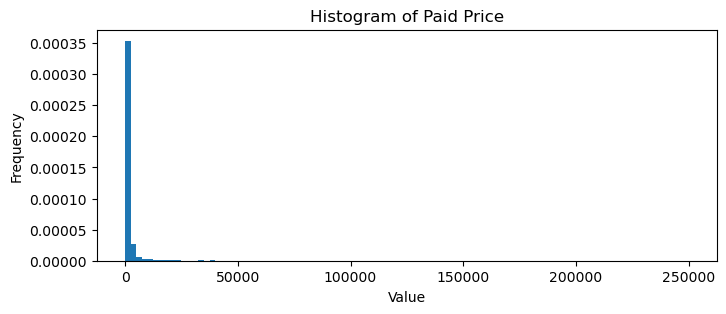

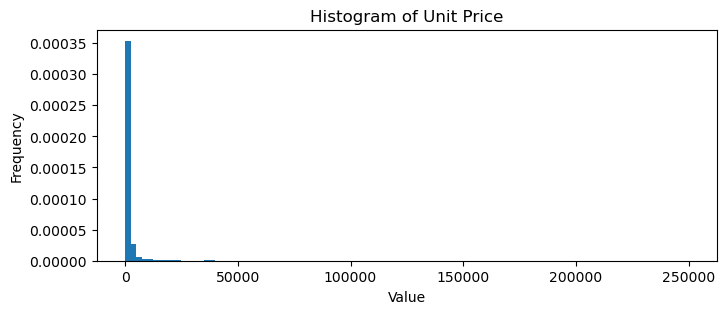

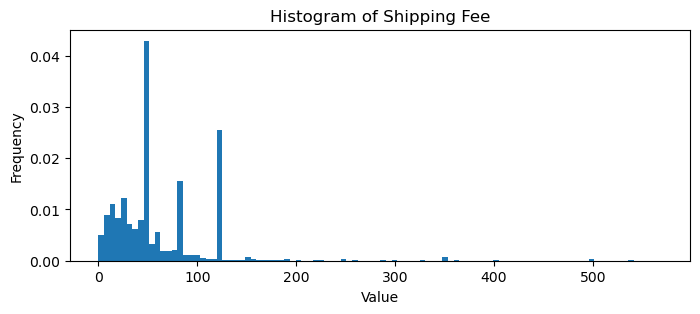

In [57]:
for col in num_col:
    
    plt.figure(figsize=(8,3))

    # create a histogram plot
    plt.hist(data[col], bins=100, density=True)

    # set the title and axis labels
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# display the plot
plt.show()

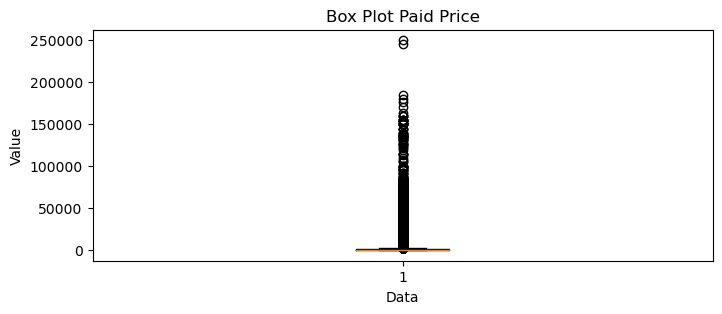

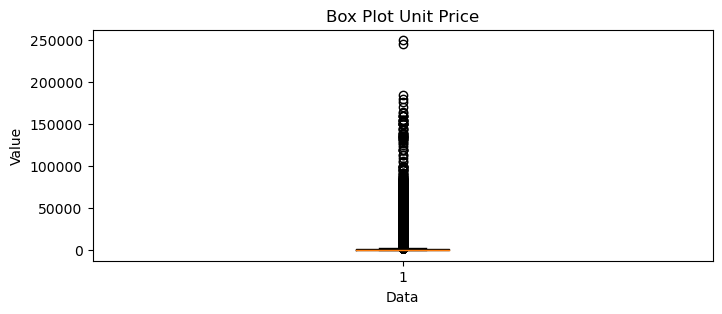

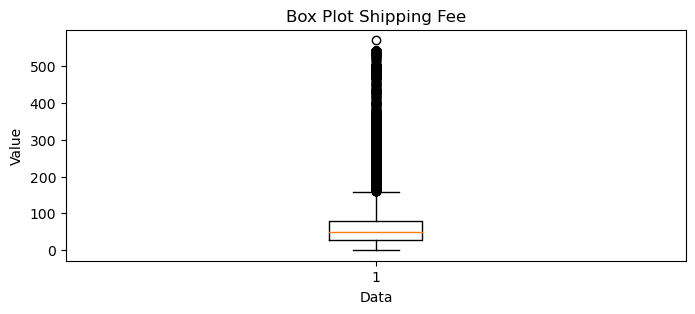

In [58]:
for col in num_col:
    
    plt.figure(figsize=(8,3))
    
    # create a box plot
    plt.boxplot(data[col])

    # set the title and axis labels
    plt.title(f'Box Plot {col}')
    plt.xlabel('Data')
    plt.ylabel('Value')

    # display the plot
    plt.show()